In [1]:
from pipeline.step_3.build_pipeline import load_and_preprocess

In [2]:
df = load_and_preprocess()

[Pipeline] ......... (step 1 of 6) Processing drop_data, total=   0.0s
[Pipeline] . (step 2 of 6) Processing drop_na_base_data, total=   0.0s
[Pipeline] . (step 3 of 6) Processing drop_fill_na_data, total=   0.1s
[Pipeline]  (step 4 of 6) Processing drop_non_informative_data, total=   0.1s


/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_, inplace=True)
/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X.groupby([self.col_group_by_1, self.col_group_by_2])[
/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

[Pipeline]  (step 5 of 6) Processing join_non_informative_data, total=   0.0s
[Pipeline] . (step 6 of 6) Processing group_by_day_data, total=   5.2s
[Pipeline] ...... (step 1 of 2) Processing keep_feature, total=   0.0s


/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[Pipeline] ............... (step 2 of 2) Processing knn, total=  41.7s


In [69]:
# df_copy = df.copy()
df = df_copy.copy()

In [4]:
# from pipeline.step_4.build_pipeline import visualization, set_datetime
# df.head(1)
# visualization(df)

In [70]:
from pandas.tseries.offsets import DateOffset
from utils.reader import ReadData
import pandas as pd


def train_test_split(df):

    def get_split(df: pd.DataFrame):
        offset = df.index[-1] - DateOffset(weeks=1)
        df_train = df[df.index < offset]
        df_test = df[df.index >= offset]
        df_train.reset_index(inplace=True)
        df_test.reset_index(inplace=True)
        return df_train, df_test

    df = set_datetime(df)
    df_train, df_test = get_split(df)

    return df_train, df_test


def set_target(df):
    TARGET = 'TARGET'
    qp, qr = 'quantity_of_paid', 'quantity_of_return',
    df[TARGET] = df[qp] - df[qr]
    df.drop([qp, qr], axis=1, inplace=True)
    return df


def set_datetime(df):
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date', drop=True, inplace=False)
    df.sort_index(inplace=True)
    return df


def load_and_preprocess(df):
    df = set_target(df)
    df = set_datetime(df)
    # df_train, df_test = train_test_split(df)
    # return df_train, df_test
    return df

In [71]:
df = load_and_preprocess(df)

In [72]:
shop_id = df.shop_id[0]
offer_id = df.groupby('offer_id')['TARGET'].sum().index[df.groupby('offer_id')['TARGET'].sum().argmax()]
df_run = df.loc[(df.shop_id == shop_id) & (df.offer_id == offer_id)]
df_run.drop(['shop_id', 'offer_id', 'title', 'warehouse_name', 'delivery_schema'], axis=1, inplace=True)

In [73]:
df_run.head(1)


,num_actions,position_category,price_index,external_index_data_minimal_price,external_index_data_price_index_value,self_marketplaces_index_data_minimal_price,self_marketplaces_index_data_price_index_value,marketing_seller_price,marketing_price,conv_tocart,conv_tocart_pdp,hits_tocart,hits_tocart_pdp,hits_view_search,gross_profit,sales_profit,prime_cost_of_paid,prime_cost_of_return,cancellation_processing,seller_bonuses_cost,cross_docking_cost_prod,gds_net_profit_after_tax,gds_profitability_after_tax,other_cost_prod,placement_cost_prod,promotion_advertising_prod,promotion_reviews_prod,shop_net_profit_after_tax,shop_net_profit_bfr_tax,shop_profitability_after_tax,gds_net_profit_bfr_tax,sum_orders_commission_returns_commission_installment_sale_cost_last_mile_reverse_logistics_direct_logistics_acquiring_cost_prod,accruals,TARGET
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-01,-0.549121,0.0,-0.147836,2.290866,0.863147,-0.079189,-0.18764,-0.164954,0.0,-0.085417,-0.154751,-0.08107,0.0,-0.069317,14344.92,6432.925,-9520.56,604.48,-250.0,-59.825,-269.089369,3260.098997,1289.37,-53.104988,-205.18964,-2383.553829,-57.144943,6432.925,6432.925,2203.36,3260.098997,-7806.913233,23261.0,67


In [16]:
# Отдебажить модель для одного товара.
# Временные фичи
# сделать формулу для настройки цен
# сделать цикл для всех товаров
# 

In [127]:
# import import_ipynb
# from models import model_0 as model
# model = model.Model()

# df_run_copy = df_run.copy()
import imp
from models import model as model_py
df_run = df_run_copy.copy()

imp.reload(model_py)

model = model_py.Model()

100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


<Figure size 960x720 with 0 Axes>

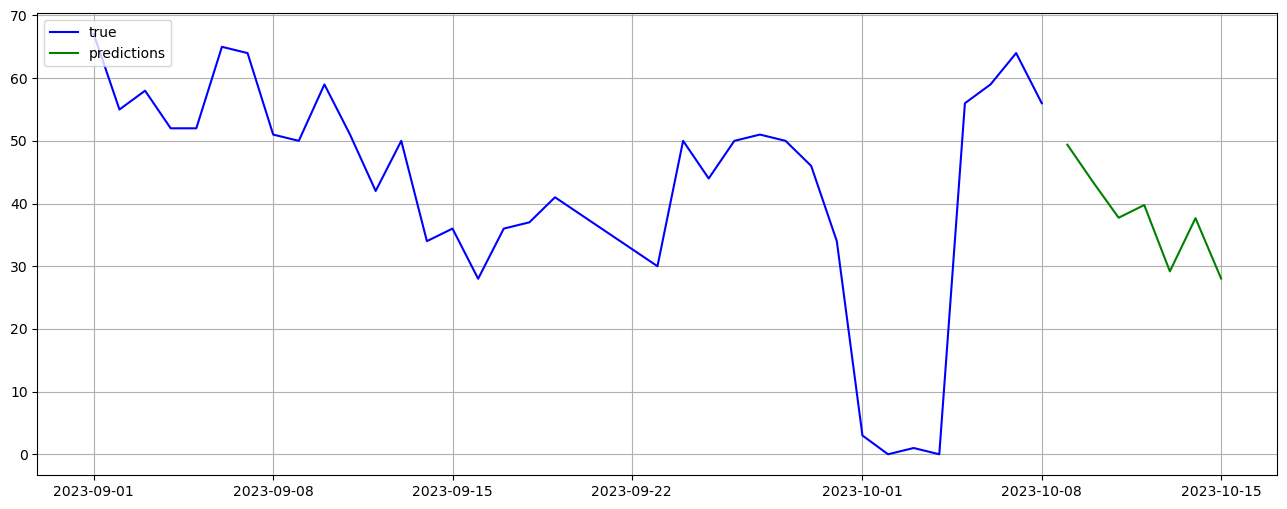

In [130]:
model.main(inference=True, df=df_run)

In [96]:

from pandas import DatetimeIndex
import numpy as np
test_df = pd.DataFrame(np.arange(7), index=DatetimeIndex(['2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
               '2023-10-13', '2023-10-14', '2023-10-15']))



In [102]:
test_df.index[0]

Timestamp('2023-10-09 00:00:00')